# Importation des bibliothèques

In [1]:
# Importation de la bibliothèque pandas pour la manipulation de données
import pandas as pd

# Importation de la bibliothèque matplotlib.pyplot pour la création de graphiques
import matplotlib.pyplot as plt

# Importation de la bibliothèque seaborn pour rendre les graphiques plus esthétiques
import seaborn as sns

# Importation de la bibliothèque numpy pour des opérations mathématiques avancées
import numpy as np

# Importation des données


In [2]:
# Chargement des données depuis le fichier Excel 
dataset = pd.read_excel("../../DataSet/data_fifa_clean.xlsx")

In [3]:
# Lecture du dataset
dataset

,ID,Name,Age,Nationality,Overall,Potential,Wage,Preferred Foot,International Reputation,Weak Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,GroupPositions,Imc
0,158023,L. Messi,31,Argentina,94,94,565000,Left,5,4,...,33,28,26,6,11,15,14,8,Striker,47.366142
1,20801,Cristiano Ronaldo,33,Portugal,94,94,405000,Right,5,4,...,28,31,23,7,11,15,14,11,Striker,45.429790
2,190871,Neymar Jr,26,Brazil,92,93,290000,Right,5,5,...,27,24,33,9,9,15,15,11,Winger,44.685039
3,193080,De Gea,27,Spain,91,93,260000,Right,4,3,...,15,21,13,90,85,87,88,94,Goalkeeper,41.706037
4,192985,K. De Bruyne,27,Belgium,91,92,355000,Right,4,5,...,68,58,51,15,13,5,10,13,Midfielder,45.876640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18114,238813,J. Lundstram,19,England,47,65,1000,Right,1,2,...,40,48,47,10,13,7,8,9,Midfielder,39.918635
18115,243165,N. Christoffersson,19,Sweden,47,63,1000,Right,1,2,...,22,15,19,10,9,9,5,12,Striker,42.202537
18116,241638,B. Worman,16,England,47,67,1000,Right,1,3,...,32,13,11,6,5,10,6,13,Striker,44.089239
18117,246268,D. Walker-Rice,17,England,47,66,1000,Right,1,3,...,20,25,27,14,6,14,8,9,Winger,45.876640


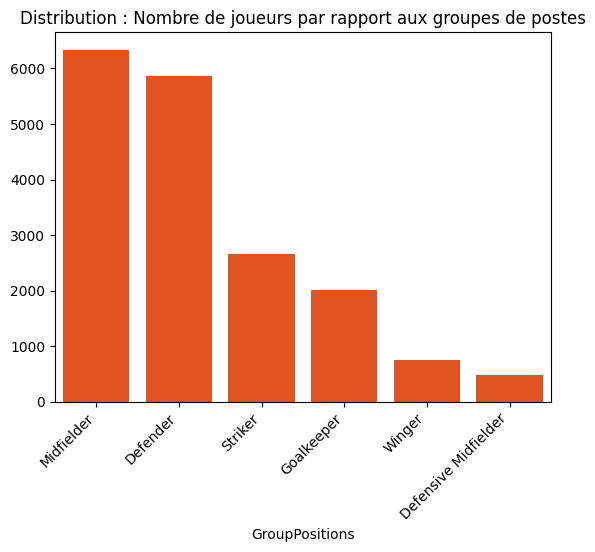

In [4]:
# Répartition des joueurs par groupes de postes:

# Calcul de l'effectif des joueurs par groupe de postes et tri par ordre décroissant
Occurences_joueurs_par_poste = dataset["GroupPositions"].value_counts().sort_values(ascending=False)

# Création du graphique de distribution à barres horizontales en utilisant Seaborn pour visualiser les données
sns.barplot(x=Occurences_joueurs_par_poste.index, y=Occurences_joueurs_par_poste.values, color='orangered')

# Personnalisation des étiquettes de l'axe des abscisses (X) en les faisant pivoter de 45 degrés
plt.xticks(rotation=45, ha='right')

# Ajout du titre au graphique
plt.title('Distribution : Nombre de joueurs par rapport aux groupes de postes')

# Affichage du graphique
plt.show()

C:\Users\konan\AppData\Local\Temp\ipykernel_24504\2810870669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taille_moyenne.index, y=taille_moyenne.values, palette=palette)


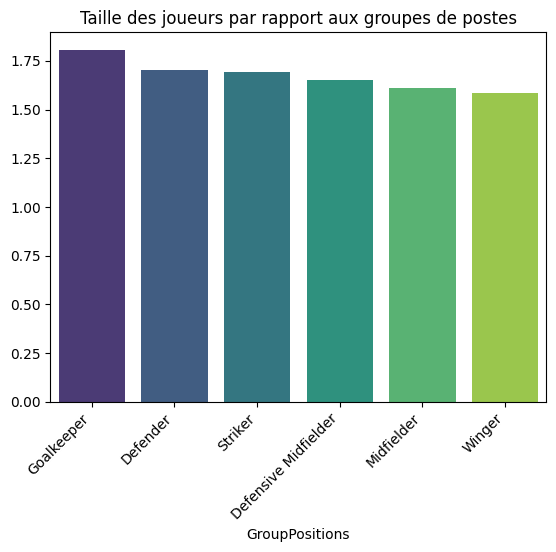

In [5]:
# Taille moyenne par groupe de postes avec des couleurs différentes pour chaque barre
taille_moyenne = dataset.groupby("GroupPositions")["Height"].mean().sort_values(ascending=False)
palette = sns.color_palette("viridis", len(taille_moyenne))  # Choisir une palette de couleurs, "viridis" dans cet exemple
sns.barplot(x=taille_moyenne.index, y=taille_moyenne.values, palette=palette)
plt.xticks(rotation=45, ha='right')
plt.title('Taille des joueurs par rapport aux groupes de postes')
plt.show()


C:\Users\konan\AppData\Local\Temp\ipykernel_24504\2292385489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taille_moyenne.index, y=taille_moyenne.values, palette=palette)


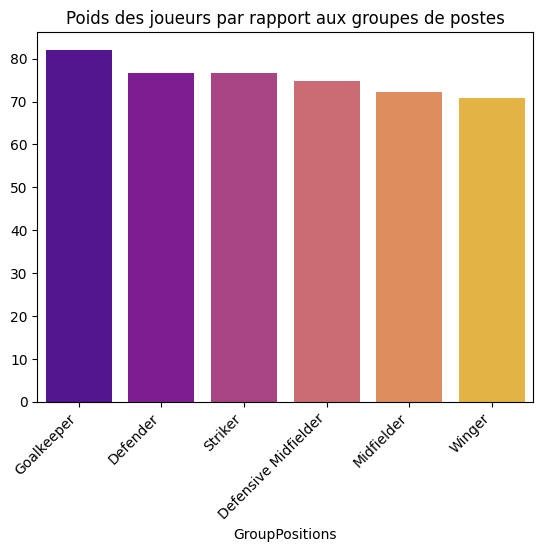

In [6]:
# Taille moyenne par groupe de postes avec une palette voisine de "viridis"
taille_moyenne = dataset.groupby("GroupPositions")["Weight"].mean().sort_values(ascending=False)
palette = sns.color_palette("plasma", len(taille_moyenne))  # Choisir une palette de couleurs, "plasma" dans cet exemple
sns.barplot(x=taille_moyenne.index, y=taille_moyenne.values, palette=palette)
plt.xticks(rotation=45, ha='right')
plt.title('Poids des joueurs par rapport aux groupes de postes')
plt.show()

## Fonctions 

In [7]:
# Fonction pour grouper et calculer la moyenne des compétences PAR groupe de postes:

def moyenne_competences_groupees(GroupPositions=""):
    # Récupération de l'index de la première à la dernière compétence dans le DataSet
    index_colonne_debut = dataset.columns.get_loc("Crossing")  
    index_colonne_fin = dataset.columns.get_loc("GKReflexes")

    # Sélection des colonnes des compétences dans le DataSet
    colonnes_competences = dataset.columns[index_colonne_debut:index_colonne_fin]

    # Filtrage des données du DataSet en fonction du groupe de postes spécifié   
    donnees_groupe = dataset[dataset["GroupPositions"]== GroupPositions]     

    # Calcule des moyennes des compétences pour le groupe spécifié et trie par ordre décroissant
    moyennes_groupe = donnees_groupe[colonnes_competences].mean().sort_values(ascending=False)     

    return moyennes_groupe[:7]     # Retourne seulement les 7 premières compétences (les plus élevées)

In [8]:
# Liste des catégories et des compétences associées
categories_evaluations = {
    "Offensive": ["Crossing", "Finishing", "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongShots"],
    "Controles": ["ShortPassing", "LongPassing", "BallControl", "Vision"],
    "Vitesse": ["Agility", "SprintSpeed", "Acceleration"],
    "Force": ["Jumping", "ShotPower", "Stamina", "Strength"],
    "Réactivité": ["Reactions", "Balance", "Aggression", "Composure"],
    "Défense": ["Marking", "StandingTackle", "SlidingTackle", "Interceptions"],
    "Vision": ["Positioning", "Vision", "Penalties"]
}

In [9]:
# Fonction pour voir la distribution des compétences par groupe de postes en pourcentage:
def taux_competences_par_poste():
    # Liste des groupes de postes
    groupes_postes = ["Striker", "Goalkeeper", "Defensive Midfielder", "Midfielder", "Defender", "Winger"]

    # Définition de la disposition des sous-plots
    num_rows = 2
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 10))

    # Ajustement de l'espacement entre les sous-plots
    plt.subplots_adjust(hspace=0.5)

    for i, poste in enumerate(groupes_postes):
        index_colonne_debut = dataset.columns.get_loc("Crossing")
        index_colonne_fin = dataset.columns.get_loc("GroupPositions")
        colonnes_competences = dataset.columns[index_colonne_debut:index_colonne_fin]

        donnees_poste = dataset[dataset["GroupPositions"] == poste]
        moyennes_compétences = donnees_poste[colonnes_competences].mean().sort_values(ascending=False)

        # Normalisation des compétences en pourcentage
        moyennes_compétences_percent = (moyennes_compétences / 100) * 100

        sns.barplot(x=moyennes_compétences_percent.index, y=moyennes_compétences_percent.values, ax=axes[i // num_cols, i % num_cols], color='lightslategray', edgecolor='w')
        axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=45, ha='right')
        axes[i // num_cols, i % num_cols].set_title(f'Distribution des compétences en pourcentage - {poste}')
        axes[i // num_cols, i % num_cols].set_ylabel('Moyenne des compétences en pourcentage')
        axes[i // num_cols, i % num_cols].set_xlabel('Compétences')

    # Affichage de la figure avec tous les sous-plots
    plt.show()

C:\Users\konan\AppData\Local\Temp\ipykernel_24504\3009502490.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=45, ha='right')
C:\Users\konan\AppData\Local\Temp\ipykernel_24504\3009502490.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=45, ha='right')
C:\Users\konan\AppData\Local\Temp\ipykernel_24504\3009502490.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=45, ha='right')
C:\Users\konan\AppData

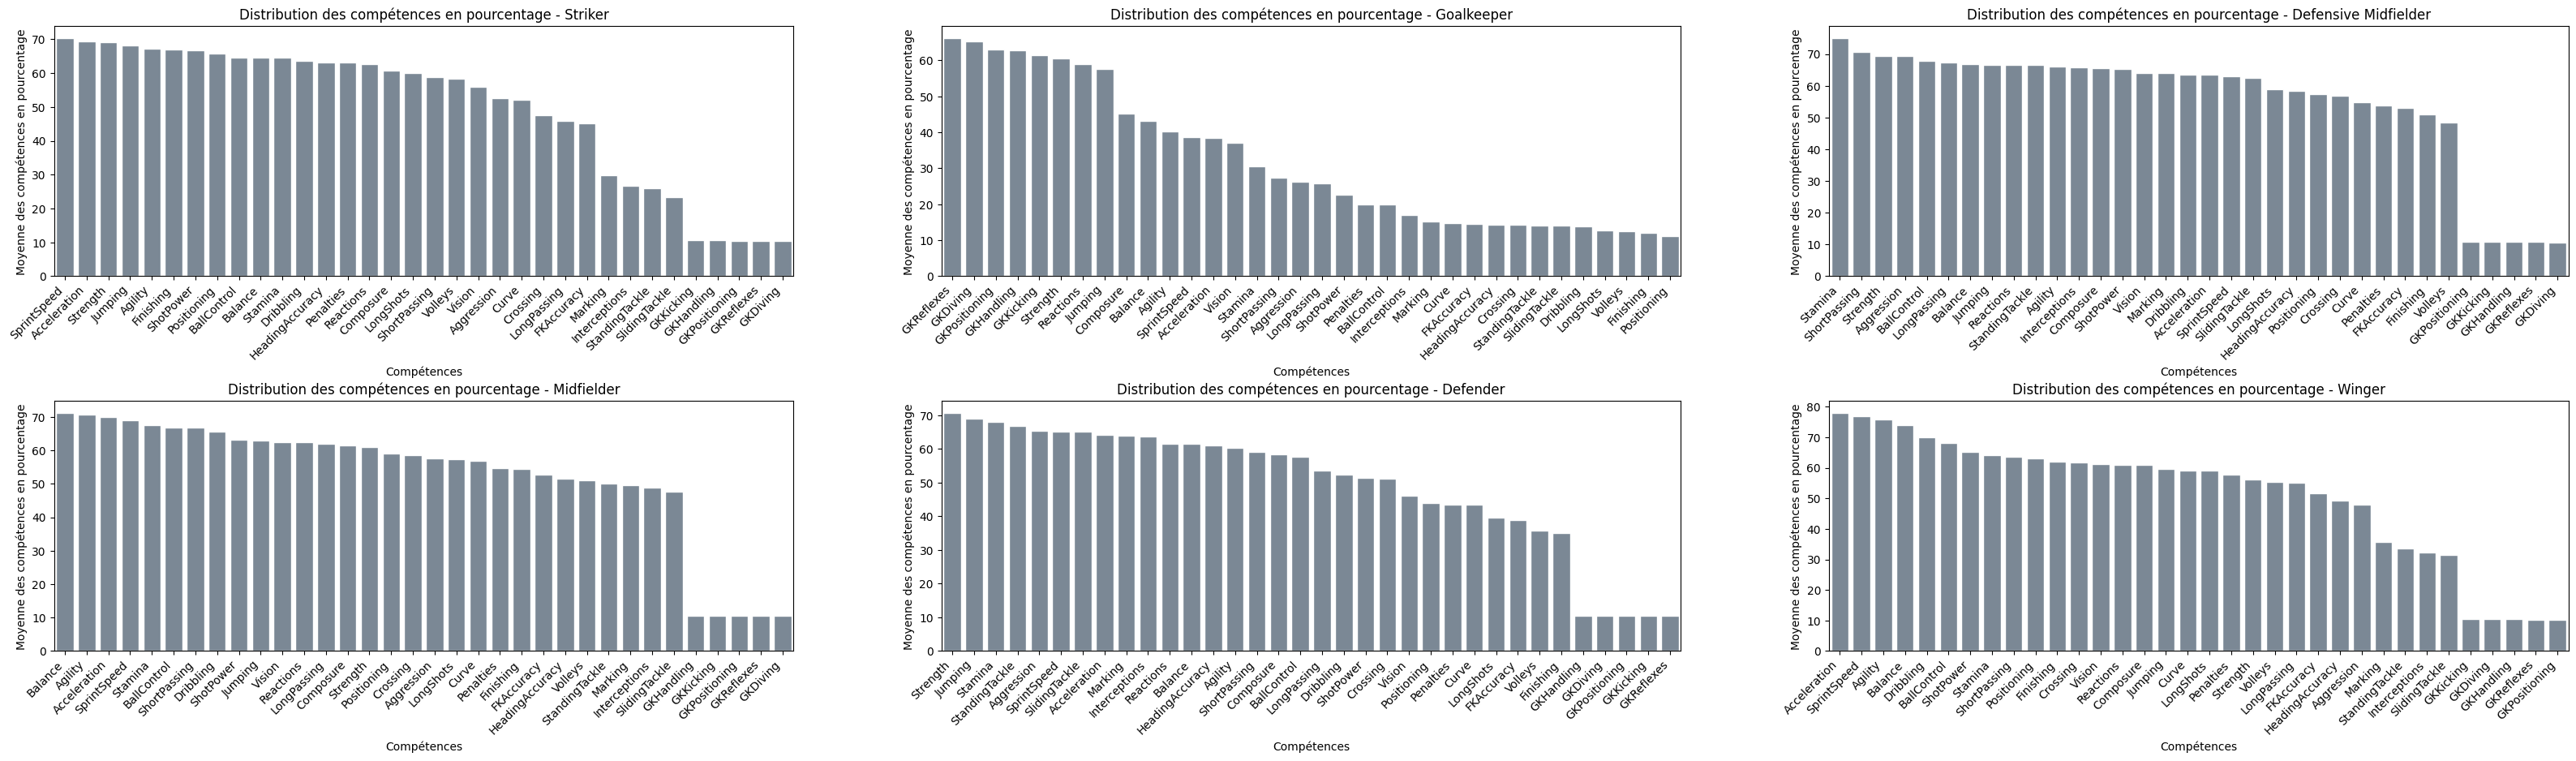

In [10]:
# Appel de la fonction pour voir la distribution des compétences en pourcentage par groupe de postes
taux_competences_par_poste()

In [11]:
# Liste des compétences représentant différentes aspects des joueurs
competences = ["Crossing", "Finishing", "HeadingAccuracy", "ShortPassing", "Volleys", "Dribbling",
               "Curve", "FKAccuracy", "LongPassing", "BallControl", "Acceleration", "SprintSpeed",
               "Agility", "Reactions", "Balance", "ShotPower", "Jumping", "Stamina", "Strength",
               "LongShots", "Aggression", "Interceptions", "Positioning", "Vision", "Penalties",
               "Composure", "Marking", "StandingTackle", "SlidingTackle", "GKDiving", "GKHandling",
               "GKKicking", "GKPositioning", "GKReflexes"]

In [12]:
# Calcul des moyennes des compétences pour chaque groupe de postes
moyennes_par_poste = dataset.groupby("GroupPositions")[competences].mean()

# Réorganisation des colonnes pour les afficher par ordre décroissant de moyenne
moyennes_par_poste = moyennes_par_poste[competences].mean(axis=1).sort_values(ascending=False)

In [13]:
# Fonction pour voir la distribution des compétences par groupe de postes en radar:
def radar_competences_par_poste():
    # Liste des groupes de postes
    groupes_postes = ["Striker", "Goalkeeper", "Defensive Midfielder", "Midfielder", "Defender", "Winger"]

    # Définition des angles pour chaque compétence en fonction du nombre de compétences
    num_competences = len(categories_evaluations["Offensive"])
    angles = np.linspace(0, 2 * np.pi, num_competences, endpoint=False).tolist()

    # Création des sous-plots en radar
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), subplot_kw=dict(polar=True))

    # Ajustement de l'espacement entre les sous-plots
    plt.subplots_adjust(hspace=0.5)

    for i, poste in enumerate(groupes_postes):
        # Sélection des données pour le poste spécifié
        donnees_poste = dataset[dataset["GroupPositions"] == poste]

        # Calcul des moyennes des compétences pour le poste
        moyennes_compétences = donnees_poste[categories_evaluations["Offensive"]].mean().tolist()

        # Ajout de la première compétence à la fin pour fermer le radar
        moyennes_compétences += moyennes_compétences[:1]

        # Création du radar
        ax = axes[i // 3, i % 3]
        ax.plot(angles, moyennes_compétences[:-1], color='lightslategray', linewidth=2, linestyle='solid')  # Enlever le dernier élément
        ax.fill(angles, moyennes_compétences[:-1], color='lightslategray', alpha=0.4)

        # Personnalisation du radar
        ax.set_title(f'Distribution des compétences - {poste}')
        ax.set_yticklabels([])  # Supprime les étiquettes des axes radiaux
        ax.set_xticks(angles)
        ax.set_xticklabels(categories_evaluations["Offensive"], rotation=45, ha='right')

    # Affichage de la figure avec tous les sous-plots
    plt.show()

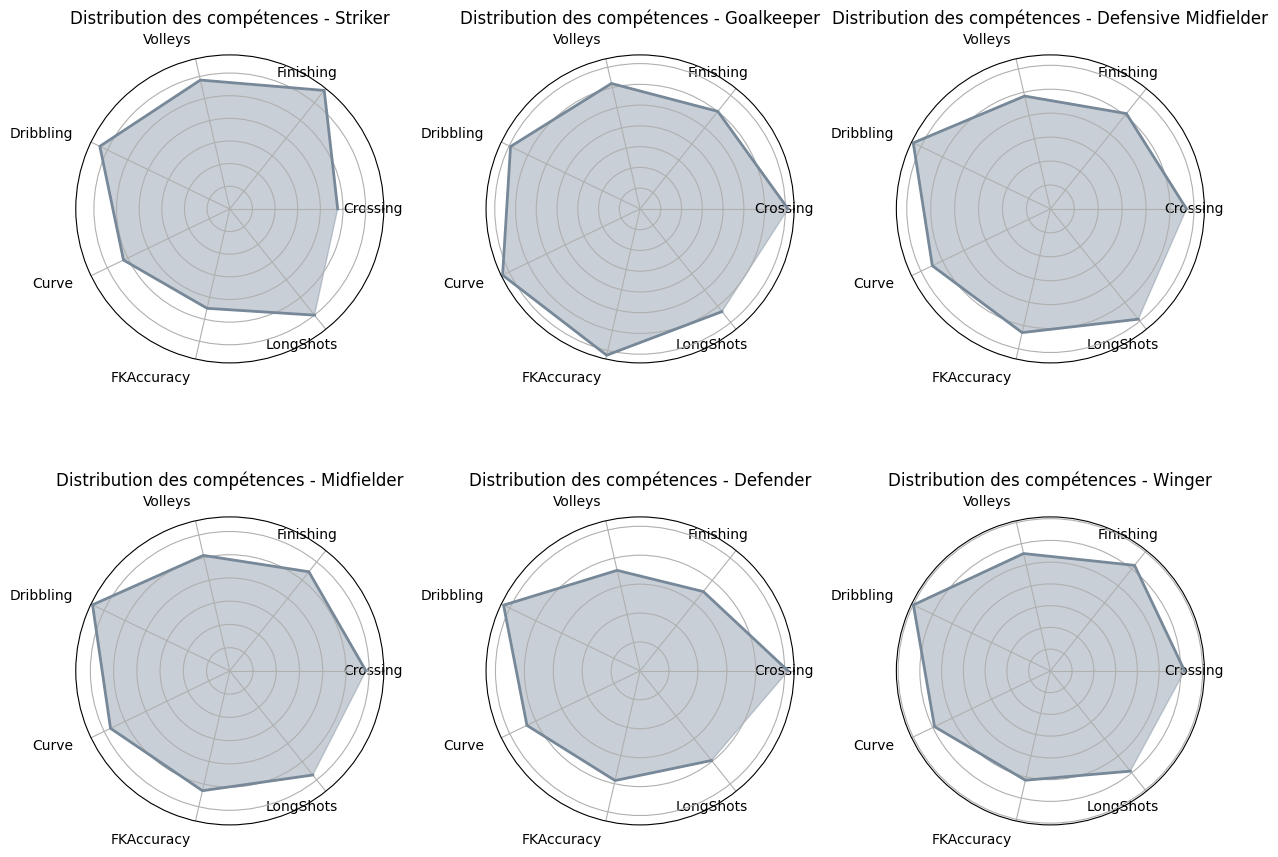

In [14]:
# Appel de la fonction pour voir la distribution des compétences en radar par groupe de postes
radar_competences_par_poste()

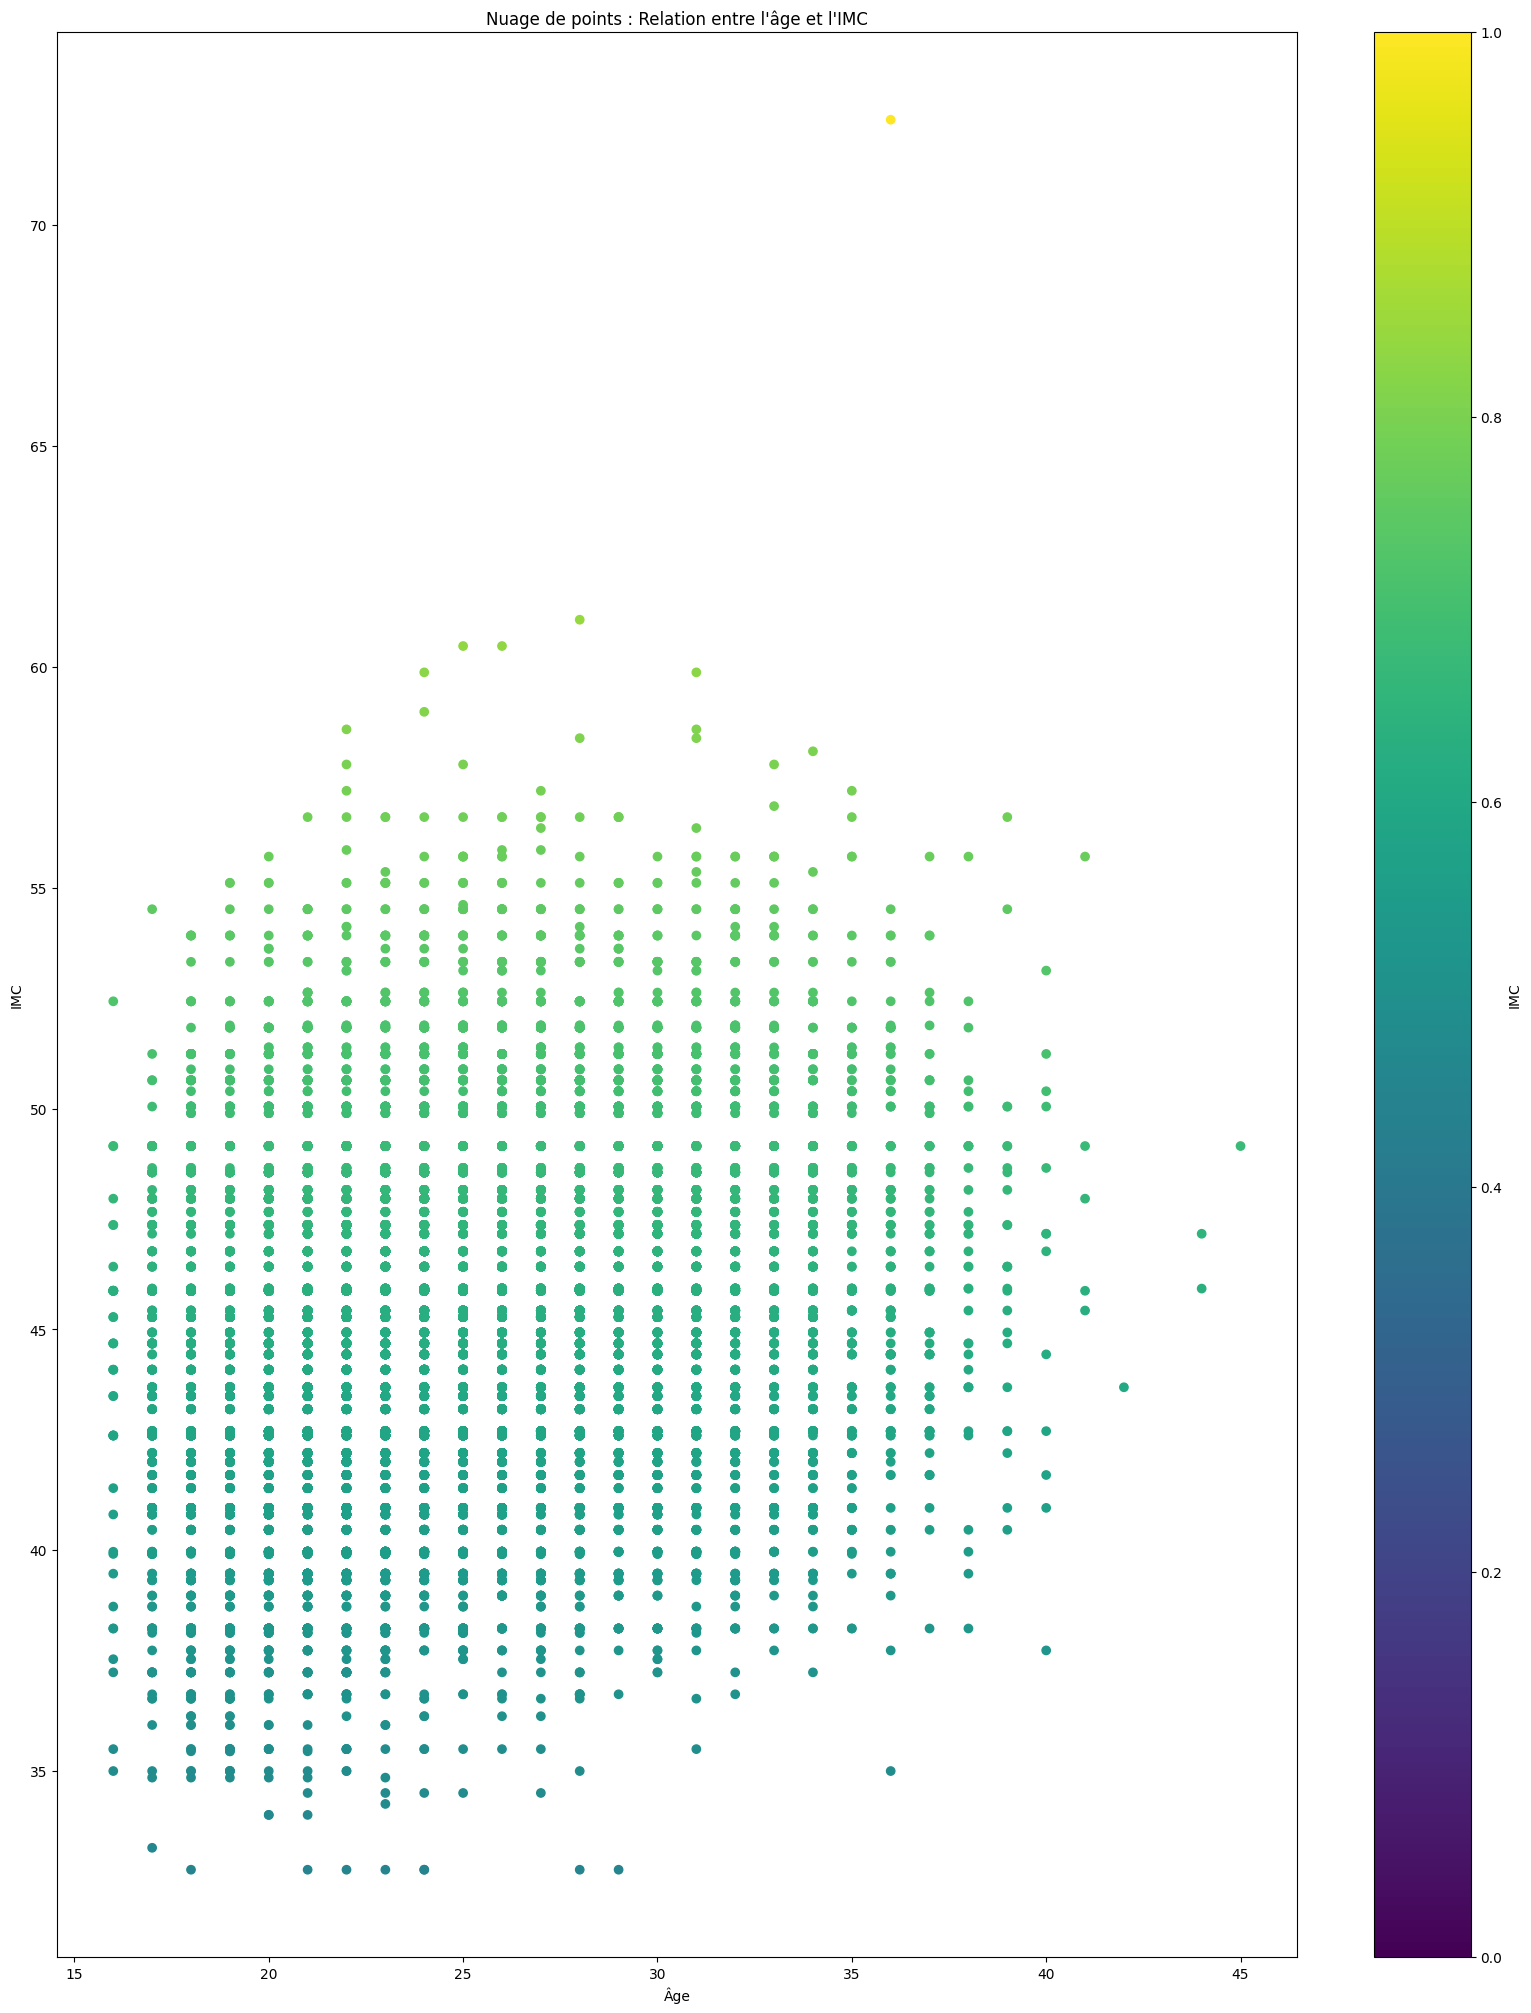

In [15]:
# Graphe AGE IMC avec des couleurs différentes pour chaque valeur d'IMC et des dimensions plus grandes
age = dataset['Age']
imc = dataset['Imc']

# Définir une séquence de couleurs en fonction des valeurs d'IMC
colors = plt.cm.viridis(imc / imc.max())  # Utilisation de la palette viridis, mais vous pouvez choisir une autre palette

# Dimensions plus grandes du graphe
fig, ax = plt.subplots(figsize=(20, 25))

plt.scatter(age, imc, c=colors)

plt.title('Nuage de points : Relation entre l\'âge et l\'IMC')
plt.xlabel('Âge')
plt.ylabel('IMC')

# Ajouter une légende de couleur
plt.colorbar(label='IMC')  

plt.show()